![image](screenshot.png)

In [16]:
from datasets import load_dataset

dataset = load_dataset("csv", data_files="../data/IMDB_1.csv")
dataset

DatasetDict({
    train: Dataset({
        features: ['review_es', 'sentiment'],
        num_rows: 250
    })
})

In [17]:
df = dataset["train"].to_pandas()
df["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [18]:
df

,review_es,sentiment
0,Uno de los otros críticos ha mencionado que de...,positive
1,Una pequeña pequeña producción.La técnica de f...,positive
2,Pensé que esta era una manera maravillosa de p...,positive
3,"Básicamente, hay una familia donde un niño peq...",negative
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positive
...,...,...
245,He visto esta película al menos 100 veces y to...,positive
246,Este espectáculo no tiene absolutamente ningún...,negative
247,¡Esta película fue tan mala que fue divertido!...,negative
248,"Meryl Streep es un genio.Bueno, al menos como ...",positive


# <font color='orange'>Направете претпроцесирање на податоците</font>

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels = encoder.fit_transform(dataset["train"]["sentiment"])
labels

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0])

In [20]:
dataset["train"] = dataset["train"].add_column("label", labels)
dataset['train'] = dataset['train'].remove_columns("sentiment")
dataset = dataset.rename_column("review_es", "text")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 250
    })
})

In [33]:
df = dataset["train"].to_pandas()
num_classes = len(df["label"].unique())

# <font color='orange'>Поделето го на тренирачко и тестирачко множество во сооднос 80:20</font>

In [22]:
dataset = dataset["train"].train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 160
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 40
    })
})

# <font color='orange'>Искористете соодветен трансформер модел за проблемот</font>

In [24]:
from transformers import AutoTokenizer, DataCollatorWithPadding

checkpoint = "lxyuan/distilbert-base-multilingual-cased-sentiments-student"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_texts = tokenizer(dataset["train"]["text"])

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

D:\Fax\LAIP\.venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User-PC\.cache\huggingface\hub\models--lxyuan--distilbert-base-multilingual-cased-sentiments-student. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors


In [25]:
def tokenize(sample):
    return tokenizer(sample["text"], truncation=True)

In [26]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/160 [00:00<?, ? examples/s]

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

In [27]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [28]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 160
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 40
    })
})

# <font color='orange'>Фино-подесете (тренирајте) го моделот</font>

In [29]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="trainer",
    eval_strategy="epoch",
    per_device_train_batch_size=8,  # batch size for training
    per_device_eval_batch_size=8,  # batch size for evaluation
    metric_for_best_model="f1",
    num_train_epochs=3,
)

In [35]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_classes, ignore_mismatched_sizes=True)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at lxyuan/distilbert-base-multilingual-cased-sentiments-student and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
import evaluate
import numpy as np

metric = evaluate.load("f1")

In [39]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average="weighted")

In [40]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

In [41]:
import torch

torch.cuda.is_available()

False

In [42]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [43]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)

In [44]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,No log,0.539269,0.747494
2,No log,0.656600,0.747494
3,No log,0.351849,0.874436


TrainOutput(global_step=60, training_loss=0.347784423828125, metrics={'train_runtime': 506.116, 'train_samples_per_second': 0.948, 'train_steps_per_second': 0.119, 'total_flos': 60413412999552.0, 'train_loss': 0.347784423828125, 'epoch': 3.0})

In [45]:
trainer.evaluate()

{'eval_loss': 0.3518490791320801,
 'eval_f1': 0.8744358478401031,
 'eval_runtime': 9.3294,
 'eval_samples_per_second': 4.288,
 'eval_steps_per_second': 0.536,
 'epoch': 3.0}

# <font color='orange'>Тестирајте го моделот на тестирачкото множество</font>

In [46]:
predictions = trainer.predict(tokenized_dataset["test"])

In [47]:
predictions

PredictionOutput(predictions=array([[-1.6638567 ,  1.501335  ],
       [-1.6520761 ,  1.4944547 ],
       [-1.5019475 ,  1.4679602 ],
       [-1.6983128 ,  1.4699405 ],
       [-1.6759464 ,  1.4438425 ],
       [-1.4516627 ,  1.3210843 ],
       [-1.4920034 ,  1.4247001 ],
       [-1.6433635 ,  1.4990162 ],
       [ 0.16858055, -0.06414195],
       [-1.6833079 ,  1.4184525 ],
       [-1.7076796 ,  1.417239  ],
       [ 1.8144392 , -1.5351514 ],
       [ 1.6258739 , -1.2914273 ],
       [ 1.8522938 , -1.516457  ],
       [ 1.5608214 , -1.2778987 ],
       [ 1.0704697 , -0.7342307 ],
       [ 0.6119562 , -0.38963795],
       [-1.402787  ,  1.3858937 ],
       [-1.1814772 ,  1.1355778 ],
       [-1.7227972 ,  1.4602336 ],
       [ 0.00652622,  0.08535943],
       [-1.6188031 ,  1.4881507 ],
       [ 1.3732914 , -0.99221694],
       [-1.3615096 ,  1.2859312 ],
       [-1.4713106 ,  1.4720902 ],
       [-1.6722081 ,  1.499935  ],
       [-1.7171836 ,  1.3595374 ],
       [-1.5538625 ,  1.42

In [48]:
logits, labels = predictions.predictions, predictions.label_ids
preds = np.argmax(logits, axis=-1)

In [49]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

# <font color='orange'>Пресметајте f1 score</font>

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.88      0.91      0.89        23

    accuracy                           0.88        40
   macro avg       0.88      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40



Text(0.5, 1.0, 'Confusion Matrix')

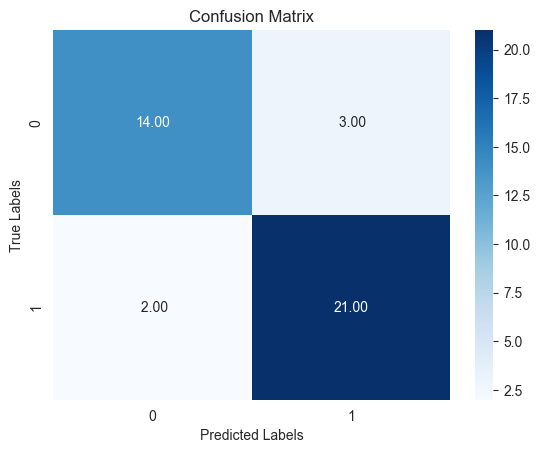

In [52]:
sns.heatmap(confusion_matrix(labels, preds), annot=True, fmt="5.2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")